<a href="https://colab.research.google.com/github/silviaaax/datastories_for_emme/blob/main/Homework9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
!python -m spacy download el_core_news_sm

In [5]:
nlp = spacy.load('el_core_news_sm')

In [6]:
news247_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/news247_df_full.csv')
news247_df

,site,url,section,title,date,author,full_text,datetime
0,news247.gr,https://www.news247.gr/koinonia/larisa-ti-prag...,ΚΟΙΝΩΝΙΑ,Λάρισα: Τι πραγματικά συνέβη με τις δύο αμαξοσ...,2023-06-28 22:12,Κωνσταντίνος Χασανδρινός,"Η εικόνα που είδε το φως της δημοσιότητας, το ...",2023-06-28 22:12:00
1,news247.gr,https://www.news247.gr/koinonia/telesigrafo-ti...,ΚΟΙΝΩΝΙΑ,Τελεσίγραφο της Frontex στην Ελλάδα: Συνεργαστ...,2023-06-28 18:40,Νίκος Γιαννόπουλος,Iδιαίτερα δύσκολη είναι η θέση της χώρας αναφο...,2023-06-28 18:40:00
2,news247.gr,https://www.news247.gr/koinonia/zakynthos-nea-...,ΚΟΙΝΩΝΙΑ,Ζάκυνθος: Συνελήφθη άνδρας για κακοποίηση σκύλ...,2023-06-28 20:48,NaN,"Νέο περιστατικό κακοποίησης ζώου, μέσα σε μόλι...",2023-06-28 20:48:00
3,news247.gr,https://www.news247.gr/koinonia/gynaikoktonia-...,ΚΟΙΝΩΝΙΑ,Γυναικοκτονία στην Κω: Στον Κορυδαλλό μεταφέρε...,2023-06-28 23:27,NaN,Στις φυλακές Κορυδαλλού αναμένεται να μεταφερθ...,2023-06-28 23:27:00
4,news247.gr,https://www.news247.gr/koinonia/larisa-ti-prag...,ΚΟΙΝΩΝΙΑ,Λάρισα: Τι πραγματικά συνέβη με τις δύο αμαξοσ...,2023-06-28 22:12,Κωνσταντίνος Χασανδρινός,"Η εικόνα που είδε το φως της δημοσιότητας, το ...",2023-06-28 22:12:00
...,...,...,...,...,...,...,...,...
167,news247.gr,https://www.news247.gr/sunday-edition/gia-ekei...,SUNDAY EDITION,Για εκείνους που θα λείπουν και φέτος από τις ...,2023-06-24 09:19,Μαριλένα Κουντούρη,Οι εκλογές είναι όντως η γιορτή της δημοκρατία...,2023-06-24 09:19:00
168,news247.gr,https://www.news247.gr/koinonia/omofoviki-epit...,ΚΟΙΝΩΝΙΑ,"Ομοφοβική επίθεση σε λεωφορείο του ΟΑΣΘ - ""Με ...",2023-06-24 08:59,NaN,Σε μια σοκαριστική καταγγελία για ομοτρανσφοβι...,2023-06-24 08:59:00
169,news247.gr,https://www.news247.gr/koinonia/chalkidiki-ant...,ΚΟΙΝΩΝΙΑ,Χαλκιδική: Άντρας βρέθηκε νεκρός μέσα στο σκάφ...,2023-06-24 08:55,NaN,Νεκρός βρέθηκε μέσα στο σκάφος του ένας άντρας...,2023-06-24 08:55:00
170,news247.gr,https://www.news247.gr/koinonia/eglima/gynaiko...,ΕΓΚΛΗΜΑ,Γυναικοκτονία στην Κω: Ο δολοφόνος της Αναστάζ...,2023-06-24 08:23,NaN,Συγκλονισμένο εξακολουθεί να παρακολουθεί το π...,2023-06-24 08:23:00


In [7]:
cv = CountVectorizer()

In [8]:
count_vector = cv.fit_transform(news247_df['full_text'])

In [9]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,00,000,00μ,01,05,050,05ο,06,07,08,...,ύψαλα,ύψος,ύψους,ώμους,ών,ώρα,ώρας,ώρες,ώστε,ἐν
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


**Vectorizer με stop words & όρια στις συχνότητες εμφάνισης των λέξεων**


In [10]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [11]:
count_vector = cv.fit_transform(news247_df['full_text'])

In [12]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,00,000,06,07,08,10,100,101,103,104,...,όρος,όφελος,όχημα,ύδατα,ύπαιθρο,ύπαρξη,ύποπτος,ύψος,ώρα,ώρες
0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


**Vectorizer με stop words & max_features**

In [13]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(news247_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,06,24,google,news,έρευνα,ακολουθήστε,αρχές,βράδυ,δύο,είπε,ειδήσεις,θεσσαλονίκης,κέντρο,μάθετε,νοσοκομείο,περιοχή,πληροφορίες,πρώτοι,σημείο,σύμφωνα
0,0,1,1,2,0,1,0,1,5,0,1,0,0,1,0,0,0,1,0,0
1,0,1,1,2,1,1,6,0,0,0,1,0,0,1,0,0,3,1,0,2
2,0,1,1,2,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1
3,1,1,1,2,0,1,4,3,0,0,1,0,0,1,0,0,0,1,2,1
4,0,1,1,2,0,1,0,1,5,0,1,0,0,1,0,0,0,1,0,0


**Vectorizer με ngrams**

In [14]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(news247_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,103 203,24 06,24 google,26 06,google news,hellenic train,news 24,news μάθετε,news247 gr,ακολουθήστε news,δευτέρας 26,ελληνικές αρχές,κέντρο θεσσαλονίκης,κυριακής 25,μάθετε πρώτοι,πρώτοι ειδήσεις,πυροσβέστες οχήματα,σαββάτου 24,συνολικού βάρους,σύμφωνα πληροφορίες
0,2,0,1,0,1,3,1,1,0,1,0,0,0,0,1,1,0,0,0,0
1,0,0,1,0,1,0,1,1,0,1,0,6,0,0,1,1,0,0,0,1
2,0,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0
3,0,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0
4,2,0,1,0,1,3,1,1,0,1,0,0,0,0,1,1,0,0,0,0


In [15]:
results.sum(axis =0).sort_values(ascending = False)

google news            170
news μάθετε            170
πρώτοι ειδήσεις        170
μάθετε πρώτοι          170
24 google              160
news 24                160
ακολουθήστε news       160
ελληνικές αρχές         33
σύμφωνα πληροφορίες     29
hellenic train          15
πυροσβέστες οχήματα     11
δευτέρας 26             11
24 06                   11
26 06                   11
κέντρο θεσσαλονίκης     10
κυριακής 25             10
news247 gr              10
σαββάτου 24             10
συνολικού βάρους        10
103 203                 10
dtype: int64

**Vectorizer με χρήση λεξικού**

In [16]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,
vocabulary = ['Θεσσαλονίκη' , 'πολύχρωμη', 'pride', 'τρανς', 'παρέλαση', 'ομοφοβική', 'ΛΟΑΤΚΙ+' , 'δικαυώματα', 'LGBTQ' , 'υποστήριξη'])
count_vector = cv.fit_transform(news247_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


,Θεσσαλονίκη,πολύχρωμη,pride,τρανς,παρέλαση,ομοφοβική,ΛΟΑΤΚΙ+,δικαυώματα,LGBTQ,υποστήριξη
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'LGBTQ+ Data')

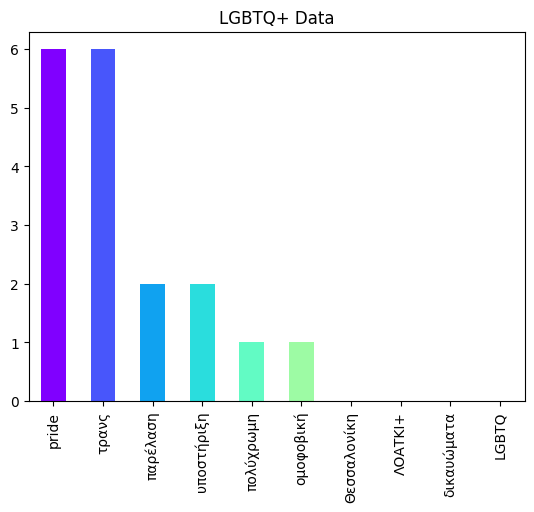

In [17]:
results.sum(axis =0).sort_values(ascending = False).plot(kind='bar' , color=plt.cm.rainbow(np.linspace(0, 1, len(results.columns))))
plt.title("LGBTQ+ Data")

# **TFIDF VECTORIZER GENERAL**

In [18]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(news247_df['full_text'])

In [19]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

,00,000,06,10,103,11,12,13,14,15,...,χτύπησε,χώρα,χώρας,χώρες,χώρο,όνομα,όχημα,ύψος,ώρα,ώρες
0,0.000000,0.0,0.000000,0.000000,0.172359,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.055601,0.0,0.0,0.0,...,0.0,0.189559,0.064596,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.0,0.000000,0.088563,0.000000,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.082182,0.0,0.060645,0.000000,0.000000,0.08958,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.080642,0.0,0.0,0.0,0.069997,0.0
4,0.000000,0.0,0.000000,0.000000,0.172359,0.00000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


**10 πρώτες λέξεις με το υψηλότερο άθροισμα**

In [20]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(10)

news           15.606761
δύο             9.163278
24              8.960418
πρώτοι          8.098230
google          8.065969
ειδήσεις        8.065969
μάθετε          8.051277
ακολουθήστε     8.051277
σύμφωνα         7.501277
σημείο          7.025136
dtype: float64

<Axes: >

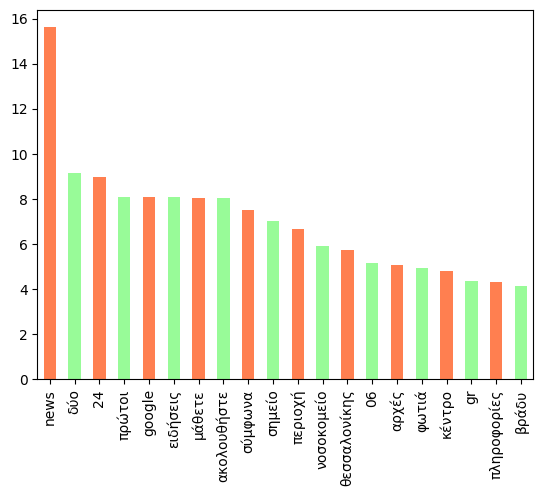

In [21]:
sum_words.sort_values(ascending = False).head(20).plot(kind='bar' , color=[ 'coral' , 'palegreen'])

# **TFIDF VECTORIZER : Υπόθεση Αναστάζια**

In [23]:
vocabulary = ['γυναικοκτονία' , 'ανθρωποκτονία' , 'Αναστάζια', 'Κω', 'Κως', 'έγκλημα' , 'εξαφάνιση' , 'έρευνα' , 'έρευνες' , 'μητέρα' , 'ίχνη' , 'εθελόντρια', 'αλυκές', 'περιοχή', 'θύμα', 'δολοφονία', 'δολοφόνος', 'βιασμό', 'πτώμα', 'θάνατο' , 'θάνατος' ,'σορός', 'σακούλες', '27χρονης', '32χρονος']

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words=list(nlp.Defaults.stop_words), vocabulary=vocabulary)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(news247_df['full_text'])

In [25]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

,γυναικοκτονία,ανθρωποκτονία,Αναστάζια,Κω,Κως,έγκλημα,εξαφάνιση,έρευνα,έρευνες,μητέρα,...,δολοφονία,δολοφόνος,βιασμό,πτώμα,θάνατο,θάνατος,σορός,σακούλες,27χρονης,32χρονος
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,0.0,0.164191,0.0,0.0,0.0,0.0,0.0,0.0,0.14785,0.0,...,0.492574,0.0,0.151357,0.155198,0.0,0.0,0.351572,0.0,0.164191,0.605426
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000


**Συχνότητα λέξεων και όρων σχετικά με την υπόθεση δολοφονίας της Αναστάζιας**

In [26]:
word_frequency = results[['γυναικοκτονία' , 'ανθρωποκτονία' , 'Αναστάζια', 'Κω', 'Κως', 'έγκλημα' , 'εξαφάνιση' , 'έρευνα' , 'έρευνες', 'μητέρα' , 'ίχνη' , 'εθελόντρια', 'αλυκές', 'περιοχή', 'θύμα', 'δολοφονία', 'δολοφόνος', 'βιασμό', 'πτώμα', 'θάνατο' , 'θάνατος' , 'σορός', 'σακούλες', '27χρονης', '32χρονος']]

In [27]:
word_frequency_sum = word_frequency.sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Συχνότητα των λέξεων')

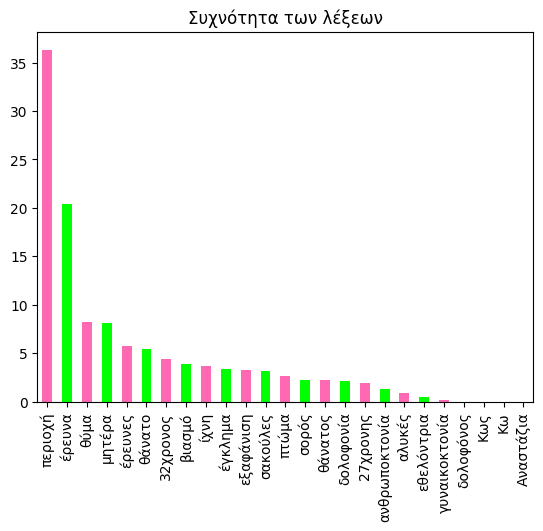

In [28]:
word_frequency_sum.plot(kind='bar' , color=[ 'hotpink' , 'lime'])
plt.title("Συχνότητα των λέξεων")

**Χρονική συχνότητα των λέξεων**

In [29]:
df_datetime = news247_df.set_index(pd.to_datetime(news247_df['datetime']))

In [30]:
word_frequency_time = df_datetime['full_text'].str.contains('|'.join(vocabulary)).astype(int).resample('D').sum()

Text(0.5, 1.0, 'Συχνότητα των λέξεων ανά χρονικά διαστήματα')

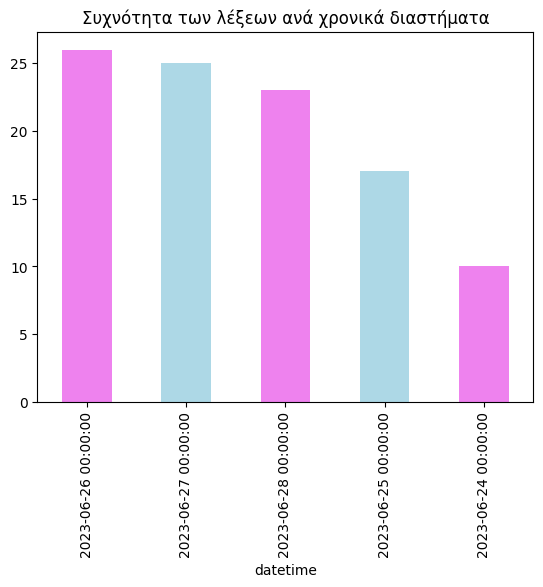

In [31]:
word_frequency_time.sort_values(ascending=False).plot(kind='bar' , color=[ 'violet' , 'lightblue'])
plt.title("Συχνότητα των λέξεων ανά χρονικά διαστήματα")

**Cosine Similarity**

In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

In [33]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

<Axes: >

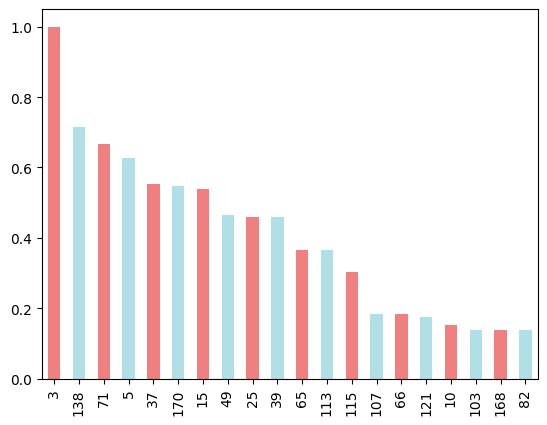

In [34]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar' , color=[ 'lightcoral' , 'powderblue'])

In [35]:
news247_df['full_text'].loc[3]

'Στις φυλακές Κορυδαλλού αναμένεται να μεταφερθεί περίπου στις 23:00 το βράδυ της Τετάρτης (28/06) ο 32χρονος από το Μπαγκλαντές, ο οποίος κατηγορείται για τη δολοφονία της 27χρονης Αναστάζια στην Κω. Όπως μεταδίδει η ΕΡΤ, ο ίδιος έχει αρνηθεί τις κατηγορίες για αρπαγή, βιασμό και ανθρωποκτονία ενώπιον της Ανακρίτριας στην Κω, ενώ μετά την απολογία του, η Ανακρίτρια διέταξε την προσωρινή κράτησή του. Σύμφωνα με τις δηλώσεις της δικηγόρου του 32χρονου κ. Αθηνάς Φουντωτού, ο 32χρονος δεν παραδέχθηκε καμία από τις κατηγορίες που τον βαραίνουν, παρά τις επανειλημμένες ερωτήσεις της Ανακρίτριας. Ο δράστης φέρεται να αναζητούσε τρόπους για να διαγράψει τα ψηφιακά ίχνη του στο διαδίκτυο αλλά και πως να εξαφανίσει τη σορό του θύματος. Από την ανάκτηση δεδομένων του κινητού του 32χρονου από το Μπαγκλαντές, προέκυψε ότι μισή ώρα πριν συναντήσει την 27χρονη Αναστάζια, στο μίνι μάρκετ, αναζητούσε ερωτική συνάντηση μέσω site, ενέργεια που δεν σχετίζεται βέβαια με την συνάντηση που είχε με το θύμα. 

In [36]:
news247_df['full_text'].loc[5]

'Νέο βίντεο - ντοκουμέντο βλέπει το φως της δημοσιότητας σχετικά με την δολοφονία της Αναστάζια στην Κω. Ο 32χρονος από το Μπαγκλαντές καταγράφεται από κάμερα ασφαλείας γειτονικού του σπιτιού να κατευθύνεται με τα πόδια προς το σημείο της δολοφονίας.  Περίπου 11 λεπτά μετά, όπως αναφέρει το MEGA, επιστρέφει περνώντας από τον ίδιο δρόμο. Δείχνει ανήσυχος και συνεχώς μιλάει στο κινητό του.  Οι Αρχές εκτιμούν ότι πήγαινε να ελέγξει αν η σορός της άτυχης κοπέλας παρέμενε θαμμένη στον θάμνο στις Αλυκές, εκεί όπου την είχε κρύψει ο ίδιος το βράδυ της 12ης Ιουνίου. Παρά τις προσπάθειές του να πείσει τις δικαστικές Αρχές ότι είναι αθώος, σειρά λαθών που έκανε το μοιραίο βράδυ τον «έκαψαν». Στο μεταξύ, συνεχείς είναι οι αποκαλύψεις για τον τρόπο που έδρασε ο 32χρονος. Ανάμεσα στα υπόλοιπα στοιχεία που κατάφεραν τα Εγκληματολογικά Εργαστήρια να ανακτήσουν από το κινητό του τηλέφωνο, πραγματοποίησαν μία έρευνα σε βάθος εξαμήνου και ανακάλυψαν πως επί ένα εξάμηνο ο κατηγορούμενος αναζητούσε, "κατέ

**Heatmap**

In [37]:
arr = cosine_similarity(tfidf_matrix_train[0:15], tfidf_matrix_train[0:15])

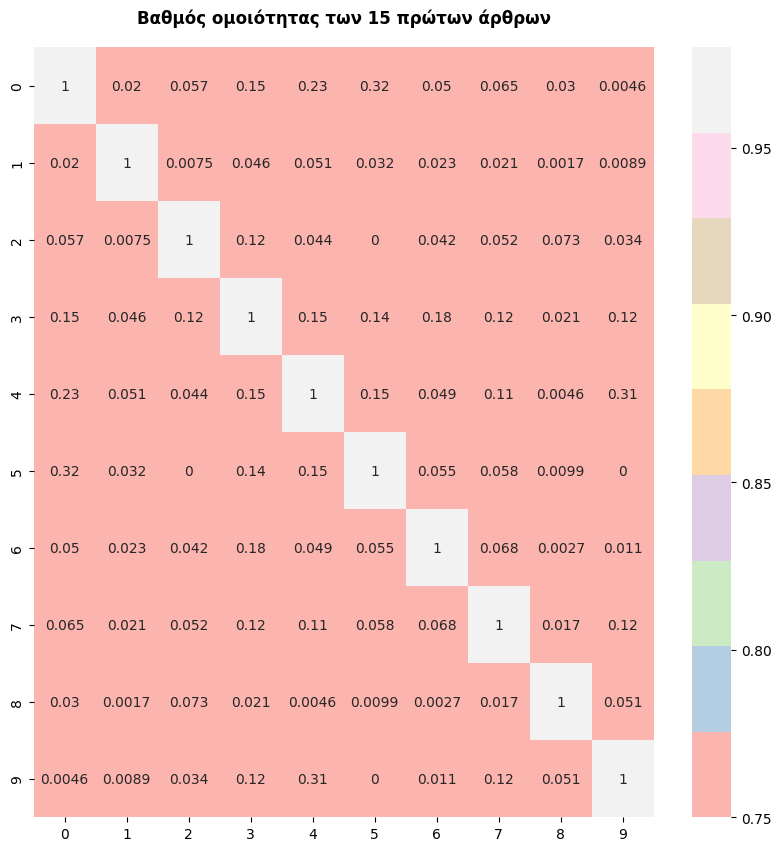

In [87]:
plt.figure(figsize=(10, 10))
plt.title('Βαθμός ομοιότητας των 15 πρώτων άρθρων', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="Pastel1")

plt.savefig('/content/drive/MyDrive/Colab Notebooks/AnastaziaHeatmap.png')

## **IN.GR VECTRORIZATION**

In [39]:
ingr_df = pd.read_csv('/content/drive/MyDrive/in.gr-MAY23.csv')
ingr_df

,site,url,date,section,title,author,text
0,in.gr,https://www.in.gr/2023/05/01/world/oukrania-sy...,2023-05-01,Κόσμος,Ουκρανία: Συνάντηση με ΝΑΤΟ για τις ανάγκες τη...,Σύνταξη ΙΝ,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...
1,in.gr,https://www.in.gr/2023/05/01/greece/kairos-vro...,2023-05-01,Ελλάδα,Καιρός: Με βροχές και καταιγίδες η επιστροφή τ...,Σύνταξη ΙΝ,Με άστατο καιρό θα πραγματοποιηθεί η επιστροφή...
2,in.gr,https://www.in.gr/2023/05/01/sports/on-field/o...,2023-05-01,On Field,Ο μύθος του Γουέμπλεϊ έγινε εκατό χρόνων,Γιώργος Νασμής,"Είναι εμβληματικό, σημείο αναφοράς, το μέρος π..."
3,in.gr,https://www.in.gr/2023/05/01/world/paragouai-n...,2023-05-01,Κόσμος,Παραγουάη: Νέος πρόεδρος εκλέγεται ο δεξιός Σα...,Σύνταξη ΙΝ,"Ο οικονομολόγος Σαντιάγο Πένια, ο υποψήφιος το..."
4,in.gr,https://www.in.gr/2023/05/01/world/tagip-ernto...,2023-05-01,Κόσμος,Ταγίπ Ερντογάν: Ο φερόμενος ως ηγέτης του Ισλα...,Σύνταξη ΙΝ,Ο «φερόμενος ως ηγέτης» της τζιχαντιστικής οργ...
...,...,...,...,...,...,...,...
8365,in.gr,https://www.in.gr/2023/05/31/greece/oxia-emfan...,2023-05-31,Ελλάδα,Οχιά εμφανίστηκε σε σπίτι στο Πανόραμα – Κλήθη...,Σύνταξη ΙΝ,Πληθαίνουν τα περιστατικά με την εμφάνιση οχιώ...
8366,in.gr,https://www.in.gr/2023/05/31/politics/kommata/...,2023-05-31,Κόμματα,Live: Η ενημέρωση από τον εκπρόσωπο Τύπου της ...,Σύνταξη ΙΝ,Αυτή την ώρα πραγματοποιείται η ενημέρωση των ...
8367,in.gr,https://www.in.gr/2023/05/31/greece/ergatiko-d...,2023-05-31,Ελλάδα,Εργατικό δυστύχημα στο Πέραμα: Συγκλονίζει η σ...,Σύνταξη ΙΝ,Συγκλονίζει η σύζυγος του 47χρονου εργάτη που ...
8368,in.gr,https://www.in.gr/2023/05/31/life/moments/kori...,2023-05-31,Moments,Το κορίτσι με σύνδρομο Down που έγινε εξώφυλλο...,Σύνταξη ΙΝ,Η Ellie Goldstein μίλησε στο «Πάμε Δανάη» για ...


In [40]:
cv = CountVectorizer()

In [41]:
ingr_df['text'] = ingr_df['text'].fillna('')
count_vector = cv.fit_transform(ingr_df['text'])

#mou vghke h pisth me ena xazo error pou evgaze h katw grammh kwdika!

In [42]:
count_vector = cv.fit_transform(ingr_df['text'])

In [41]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()
#edw crashare 2 fores to laptop mou giati posa data na anteksei! ( •_ •)

,00,000,0000,0001,000αδυνατοι7,000αδυνατοιγκενκ,000ευρώ,000μ,001,002,...,𝗕𝗹𝗲𝘂𝘀,𝗘𝗹𝗰𝗵𝗲𝗫𝗧𝗥𝗔,𝗙𝗜𝗩𝗘,𝗡𝗨𝗠𝗕𝗘𝗥,𝗫𝗜,𝗱𝗮𝗻𝗻𝘆,𝗱𝗲𝘀,𝗹𝗶𝘀𝘁𝗲,𝝟𝝾𝝸𝝻𝞈𝝻𝝴𝝼𝝾𝘀,𝝮𝞀𝝰𝝸𝝾𝘀
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Vectorizer με stop words και όρια στις συχνότητες εμφάνισης των λέξεων**


In [43]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [44]:
count_vector = cv.fit_transform(ingr_df['text'])

In [45]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,00,000,05,10,100,11,12,120,13,14,...,όρο,όρος,όρους,όφελος,όχημα,ύπαρξη,ύψος,ύψους,ώρα,ώρες
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Vectorizer με stop words και max_features**



In [46]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(ingr_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,000,2023,the,διαβαστε,δύο,είπε,εκλογές,ελλάδα,επισης,ευρώ,κάνει,κι,κυβέρνηση,νέα,σήμερα,συριζα,σύμφωνα,υπάρχει,χρόνια,χώρα
0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,4
2,4,0,0,0,3,0,0,0,0,0,0,1,0,0,2,0,0,1,1,0
3,1,1,0,1,1,0,4,0,1,0,1,2,0,0,0,0,0,0,2,3
4,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [47]:
#cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, token_pattern = '\bκυβ[α-ωά-ώ]*\b')
#count_vector = cv.fit_transform(ingr_df['text'])
#results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
#results.head()
    #edw ta tokens kai sto news247 mou evgazan errors
    #eite to diko sas token eite auto pou hthela na kanw egw : token_pattern = '\bδολοφον[ία-ημένη]*\b

**Vectorizer με ngrams**

In [48]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(ingr_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,000 ευρώ,21ης μαΐου,instagram δημοσίευση,of the,pic twitter,twitter com,αλέξης τσίπρας,απε μπε,δείτε δημοσίευση,δημοσίευση instagram,δημοσίευση κοινοποιήθηκε,διαβαστε επισης,εκατ ευρώ,κοινοποιήθηκε χρήστη,κυριάκος μητσοτάκης,νέα δημοκρατία,νέας δημοκρατίας,πηγή απε,σύμφωνα πληροφορίες,ταγίπ ερντογάν
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1


Συχνότερες σε χρήση λέξεις

<Axes: >

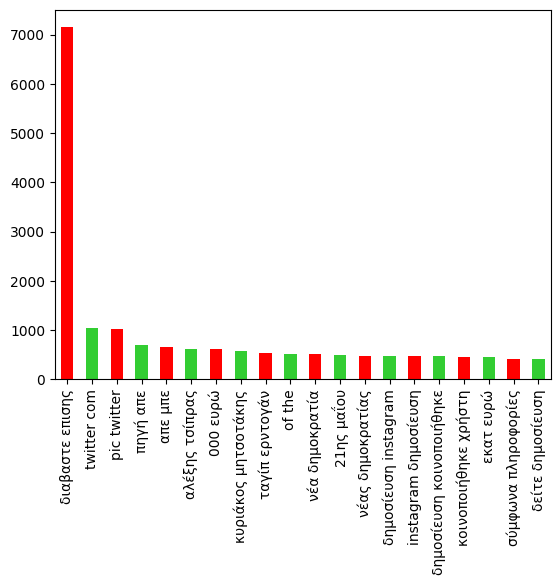

In [49]:
wordSum =  results.sum(axis =0)
wordSum.sort_values(ascending = False).head(20).plot(kind='bar' , color=[ 'r' , 'limegreen'])

Συχνότερες σε χρήση λέξεις ανα κατηγορία

In [50]:
section = "section"
textsss = "text"

In [51]:
cv = CountVectorizer(stop_words=list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)
count_vector = cv.fit_transform(ingr_df[section])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

In [52]:
results[section] = ingr_df[section]

In [53]:
alltogetherrr = results.groupby(section).sum()

In [54]:
words_to_sections = alltogetherrr.idxmax(axis=1)
words_to_sections.tail(20)

section
Κυβέρνηση                        agro
Κόμματα                       κόμματα
Κόσμος                         κόσμος
Μπάσκετ                       μπάσκετ
Οι ειδικοί απαντούν              agro
Οικονομία                   οικονομία
Οικονομικές Ειδήσεις         ειδήσεις
ΠΑΙΔΙ                            agro
Παιδί                            agro
Παρασκήνιο                       agro
Περιβάλλον                       agro
Ποδόσφαιρο                 ποδόσφαιρο
Πολιτικές Συνεντεύξεις           agro
Πολιτική                     πολιτική
Πολιτική Γραμματεία        γραμματεία
Σπορ                             σπορ
Σώμα & Υγεία                     agro
ΤΗΣ ΕΦΗΣ ΞΕΝΟΥ                   agro
ΤΟΥ ΚΩΣΤΑ ΣΚΛΑΒΕΝΙΤΗ             agro
Υγεία                            agro
dtype: object

## **TFIDF VECTORIZER**

In [55]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(ingr_df['text'])

In [56]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

,00,000,10,100,11,12,13,14,15,16,...,χρειάζεται,χρονιά,χρόνια,χρόνο,χώρα,χώρας,χώρες,χώρο,ώρα,ώρες
0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.134038,0.0,0.0,...,0.151486,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.0,0.000000,0.060637,0.0,0.108799,0.034526,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.00000,0.115853,0.000000,0.000000,0.000000,0.0,0.139387
2,0.0,0.332289,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.063988,0.08914,0.000000,0.000000,0.000000,0.096634,0.0,0.000000
3,0.0,0.057085,0.000000,0.0,0.000000,0.000000,0.067723,0.000000,0.0,0.0,...,0.000000,0.0,0.087941,0.00000,0.157001,0.060563,0.067377,0.000000,0.0,0.000000
4,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.066187,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


ΕΚΛΟΓΕΣ ΜΑΙΟΥ 2023

In [57]:
political_vocabulary = ['εκλογές', 'εκλογών', 'νδ' , 'αλέξης', 'μητσοτάκης', 'κάλπες', 'κόμμα','κόμματα' , 'κομμάτων', 'βουλή' , 'ψήφος', '21ης','αποτελέσματα', 'νίκη', 'πασοκ' ,'συριζα', 'κκε' , 'ποσοστά']

In [58]:
word_frequency1 = results[['εκλογές', 'εκλογών','νδ' , 'αλέξης' , 'μητσοτάκης', 'κάλπες', 'κόμμα', 'κόμματα' ,'κομμάτων' , 'βουλή', '21ης','αποτελέσματα', 'νίκη', 'πασοκ' ,'συριζα', 'κκε' , 'ποσοστά']]

In [59]:
word_frequency1_sum = word_frequency1.sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Συχνότητα των λέξεων για τις εκλογές 2023')

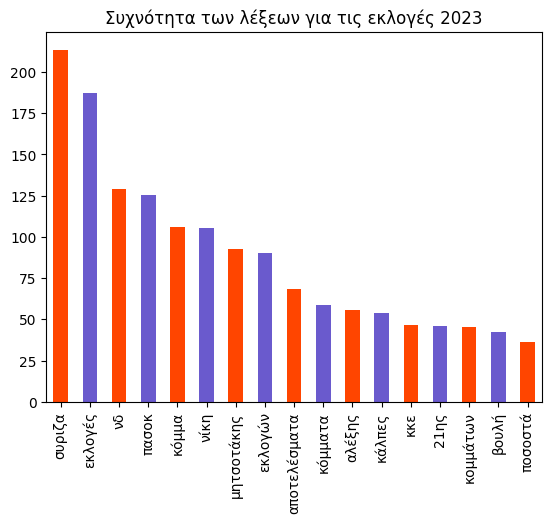

In [89]:
word_frequency1_sum.plot(kind='bar' , color=[ 'orangered' , 'slateblue'])
plt.title("Συχνότητα των λέξεων για τις εκλογές 2023")

**Cosine Similarity**

In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

In [62]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

<Axes: >

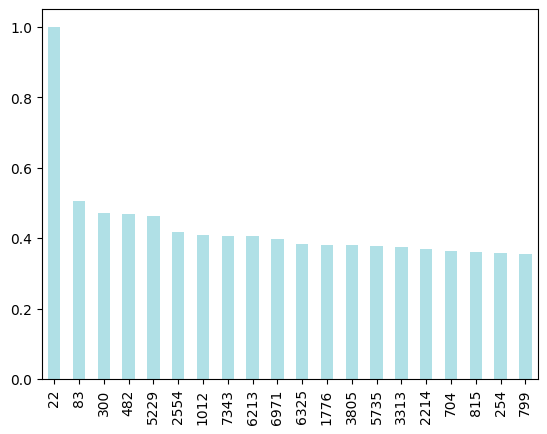

In [69]:
pd.DataFrame(arr).loc[22].sort_values(ascending = False).head(20).plot(kind = 'bar' , color=['powderblue'])

In [86]:
#hthela na dokimasw perissotera me cosine similarity alla eite to colab eite to laptop mou kapws duskoleuetai kai to afhsa

**Heatmap**

In [76]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

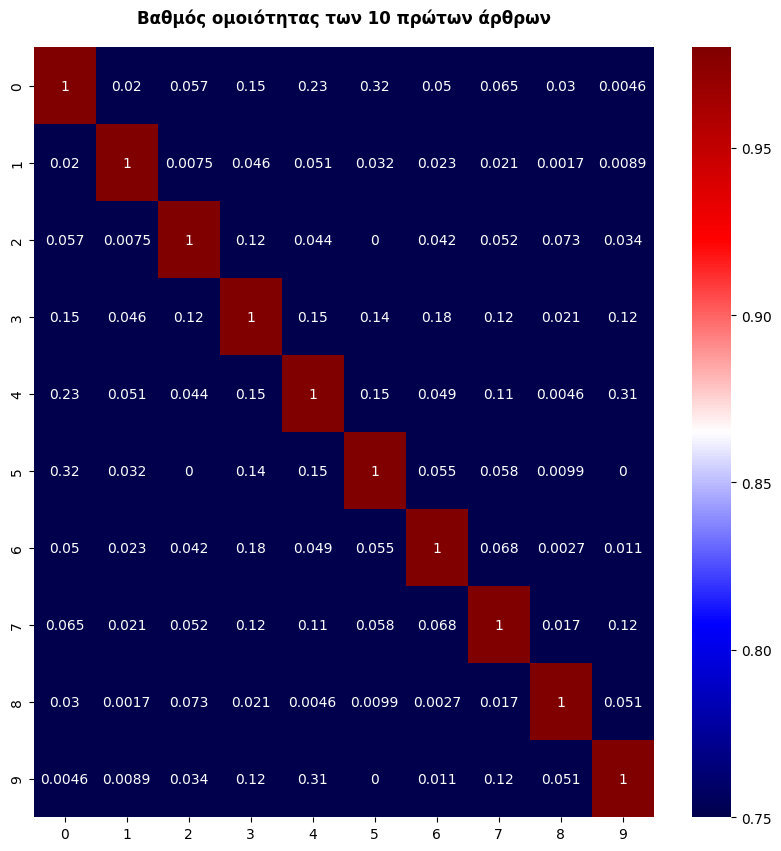

In [88]:
plt.figure(figsize=(10, 10))
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="seismic")

plt.savefig('/content/drive/MyDrive/Colab Notebooks/ElectionsHeatmap>.png')

# **COSINE SIMILARITY BETWEEN NEWS247 % IN.GR**

In [90]:
news247_text = news247_df['full_text'].str.cat(sep = ' ')

In [91]:
ingr_text = ingr_df['text'].str.cat(sep = ' ')

In [92]:
two_sites_list = []
news247D = {'site' : 'news247.gr', 'text' : news247_text}
two_sites_list.append(news247D)
ingrD = {'site' : 'in.gr', 'text' : ingr_text}
two_sites_list.append(ingrD)
two_sites_df = pd.DataFrame(two_sites_list)
two_sites_df


,site,text
0,news247.gr,"Η εικόνα που είδε το φως της δημοσιότητας, το ..."
1,in.gr,Εν μέσω προετοιμασιών για την πολυσυζητημένη ο...


In [93]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(two_sites_df['text'])

In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)
print("cosine scores ==> ", arr)

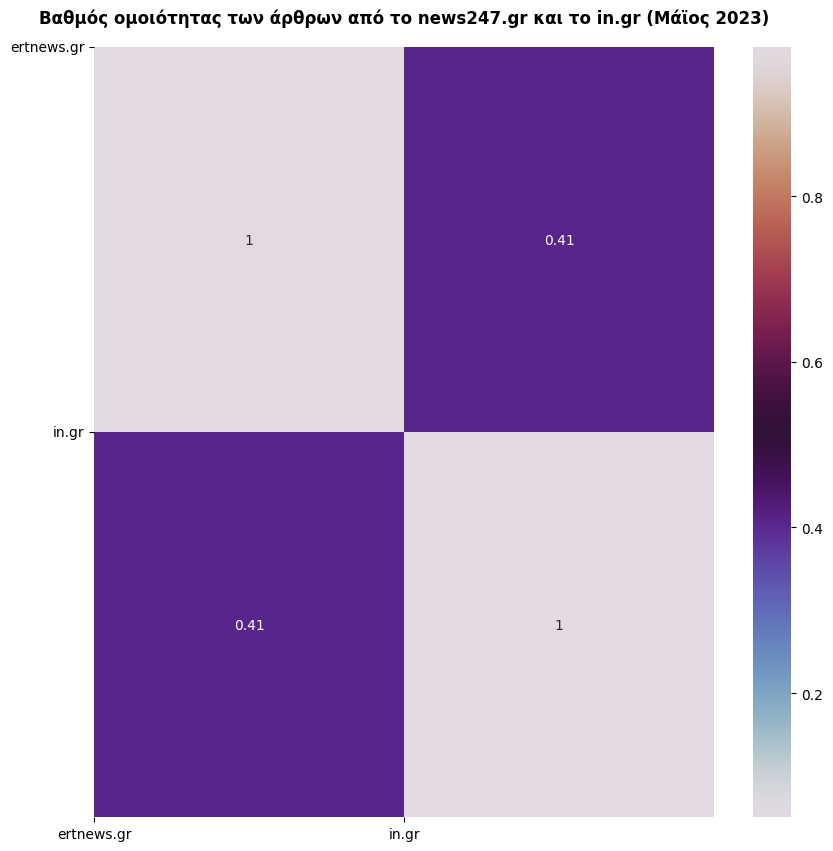

In [99]:
plt.figure(figsize=(10, 10))
plt.title('Βαθμός ομοιότητας των άρθρων από το news247.gr και το in.gr (Μάϊος 2023)', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="twilight")
plt.xticks([0, 1], ['ertnews.gr', 'in.gr'])
plt.yticks([0, 1], ['ertnews.gr', 'in.gr'], rotation=0)

plt.savefig('/content/drive/MyDrive/Colab Notebooks/news247_ingr_heatmap.png') # αποθηκεύω την εικόνα του γραφήματος στο drive